In [12]:
from dycoreutils import readdata_utils as read
from dycoreutils import plot_utils as dycoreplt

import matplotlib.pyplot as plt
import numpy as np

import sys

In [3]:
plotpath="/web/web-data/staff/islas/verticalres/"

In [5]:
# specify start and end years for plotting
ystart="1979" ; yend="1989"

In [51]:
# specifying model simulation files.
# if you want to add a new simulation, specify that by adding the following to case
# name:filename
# where "name" is the name of the experiment and "filename" is the name of the zonal wind file.
# this currently assumes $filename is located in $basepath/$name/.
basepath="/project/cas/islas/verticalresolution/"

case={"sponge5":"U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc",
     "default-sponge":"U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc",
     "sponge5_marshian":"U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian.001.1979-01_1990-12.nc",
     "sponge5-marshian_top-taper":"U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian_top-taper.001.1979-01_1989-12.nc"}

In [53]:
def plotdz(fig, data, pre, expname, x1=0.1, x2=0.9, y1=0.1, y2=0.9):
    
    plt.rcParams['font.size'] = '14'
    
    ax = fig.add_axes([x1, y1, x2-x1, y2-y1])
    ax.set_ylim(-np.log10(1000),-np.log10(0.005))
    ax.set_yticks([-np.log10(1000),-np.log10(100),-np.log10(10),-np.log10(1),-np.log10(0.1),-np.log10(0.01)])
    ax.set_yticklabels(['1000','100','10','1','0.1','0.01'])
    ax.set_ylabel('Pressure (hPa)', fontsize=16)
    ax.set_title('Grid spacing', fontsize=16)
    ax.set_xlabel('Grid spacing (m)', fontsize=16)
    
    ax.plot(np.array(data),-1.*np.log10(np.array(pre)), "o", label=expname)
    #ax.plot(np.array(data),-1.*np.log10(np.array(pre)))
    
    return ax

def oplotdz(ax, data, pre, expname):
    ax.plot(np.array(data), -1.*np.log10(np.array(pre)), "o", label=expname)
    return ax
    

/project/cas/islas/verticalresolution/sponge5/U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc
/project/cas/islas/verticalresolution/default-sponge/U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc
/project/cas/islas/verticalresolution/sponge5_marshian/U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian.001.1979-01_1990-12.nc
/project/cas/islas/verticalresolution/sponge5-marshian_top-taper/U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian_top-taper.001.1979-01_1989-12.nc


/project/cas/islas/miniconda3/envs/dycorediag/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/project/cas/islas/miniconda3/envs/dycorediag/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/project/cas/islas/miniconda3/envs/dycorediag/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Addin

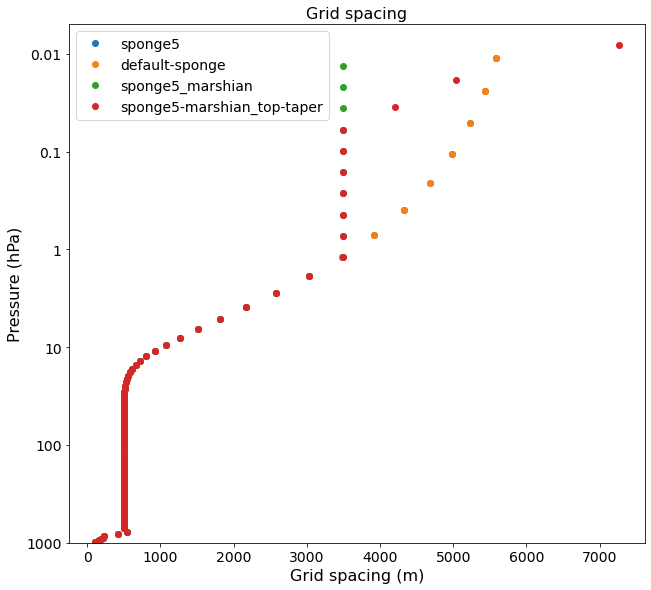

In [56]:
H=7000.
fig = plt.figure(figsize=(16,16))

countplot=0
for key in case:
    filename=case[key]
    fname=basepath+key+"/"+filename
    print(fname)
    uzm = read.read_cesm_zonalmean(fname,ystart+"-01",yend+"-12")
    ilev = uzm.ilev
    z = -H*np.log(ilev/1000.)
    dz = -1.*(np.array(z.isel(ilev=slice(1,ilev.size))) - np.array(z.isel(ilev=slice(0,ilev.size-1))))

    if (countplot == 0):
        ax = plotdz(fig, dz, uzm.lev,key,x1=0.1, x2=0.6, y1=0.5, y2=0.95)
    else:
        ax = oplotdz(ax, dz, uzm.lev, key)
        
ax.legend()

fig.savefig(plotpath+"grids.pdf", facecolor="white", bbox_inches="tight")